In [28]:
import numpy as np
import numpy

In [29]:
def gen_var_combo(num_dim, latent_dim):
    '''
    generates a combination of the latent variables that each function depends on. 
    0 represents the identity.
    
    '''
    vars_ = list(range(latent_dim))
    p = np.full(latent_dim, ((1/(latent_dim))))
    #p[0] = .5
    var_combo = np.random.choice(vars_, size = (num_dim, latent_dim), p = p)
    return var_combo

In [30]:
def gen_func_combo(num_dim, latent_dim):
    '''
    generates a random function dependant on latent dimesnions for each dimnesion
    
    '''
    funcs = ['+', '-', '*', '/']
    func_combo = np.random.choice(funcs, size = (num_dim, latent_dim-1))
    return func_combo

In [31]:
def gen_latent_space(a, num_samples, num_dim, num_latent_dim):
    '''
    Generates a num_samples by num_dimensions matrix where each dimension is a function
    of the latent dimensions.
    
    '''
    latent_samples = np.random.uniform(high = a, size = (num_samples, num_latent_dim))
    
    var_combo, func_combo, weights = gen_space_params(num_dim, num_latent_dim)

    super_sample = []
    for sample in range(num_samples):
        dimension =[]
        for dim in range(num_dim):
            weight = np.multiply(latent_samples[sample, :], weights[dim])
            dem = weight[var_combo[dim, 0]]
            for lat in range(num_latent_dim-1):
                if(func_combo[dim, lat] == '+'):
                    dem = dem + weight[int(var_combo[dim, lat])]
                elif(func_combo[dim, lat] == '-'):
                    dem = dem + weight[int(var_combo[dim, lat])]
                elif (func_combo[dim, lat] == '*'):
                    dem = dem * weight[int(var_combo[dim, lat])]
                elif (func_combo[dim, lat] == '/'):
                    dem = dem * weight[int(var_combo[dim, lat])]
            dimension.append(dem)
        #print(dimension)
        #dimension = np.concatenate(dimension)
        super_sample.append(dimension)
    return numpy.array(super_sample), latent_samples

In [32]:
def gen_space_params(num_dim, num_latent_dim):
    '''
    gets the parameters used to construct latent space
    
    '''
    var_combo = gen_var_combo(num_dim, num_latent_dim)
    func_combo = gen_func_combo(num_dim, num_latent_dim)
    weights = np.random.rand(num_dim, num_latent_dim)
    return var_combo, func_combo, weights

In [33]:
samp, lat =gen_latent_space(10, 6000, 30, 2)

In [34]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 3  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_dim = 30
# this is our input placeholder
input_img = Input(shape=(30,))
# "encoded" is the encoded representation of the input
x = Dense(input_dim, activation='relu')(input_img)
x = Dense(input_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='sigmoid')(x)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(30, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [35]:
encoder = Model(input_img, encoded)

In [36]:
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [37]:
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

In [38]:
samp.shape

(6000, 30)

In [39]:
samp.max(axis = 0).shape

(30,)

In [40]:
x_train = samp[:5000, :]/samp[:5000, :].max(axis = 0)
x_test = samp[5000:, :]/samp[:5000, :].max(axis = 0)

In [41]:
autoencoder.fit(x_train, x_train,
                epochs=5000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 5000 samples, validate on 1000 samples
Epoch 1/5000
5000/5000 [==============================] - 2s 480us/step - loss: 0.1040 - val_loss: 0.1039
Epoch 2/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.1039 - val_loss: 0.1039
Epoch 3/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.1038 - val_loss: 0.1038
Epoch 4/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.1038 - val_loss: 0.1038
Epoch 5/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.1037 - val_loss: 0.1037
Epoch 6/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.1037 - val_loss: 0.1036
Epoch 7/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.1036 - val_loss: 0.1036
Epoch 8/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.1036 - val_loss: 0.1035
Epoch 9/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.1035 - val_loss: 0.1035
Epoch 

Epoch 78/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.1000 - val_loss: 0.0999
Epoch 79/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.1000 - val_loss: 0.0998
Epoch 80/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.1000 - val_loss: 0.0998
Epoch 81/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0999 - val_loss: 0.0997
Epoch 82/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0999 - val_loss: 0.0997
Epoch 83/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0998 - val_loss: 0.0997
Epoch 84/5000
5000/5000 [==============================] - 0s 23us/step - loss: 0.0998 - val_loss: 0.0996
Epoch 85/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0997 - val_loss: 0.0996
Epoch 86/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0997 - val_loss: 0.0995
Epoch 87/5000
5000/5000 [=====================

Epoch 155/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0970 - val_loss: 0.0968
Epoch 156/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0970 - val_loss: 0.0967
Epoch 157/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0970 - val_loss: 0.0967
Epoch 158/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0969 - val_loss: 0.0966
Epoch 159/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0969 - val_loss: 0.0966
Epoch 160/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0969 - val_loss: 0.0966
Epoch 161/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0968 - val_loss: 0.0965
Epoch 162/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0968 - val_loss: 0.0965
Epoch 163/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0968 - val_loss: 0.0965
Epoch 164/5000
5000/5000 [===========

5000/5000 [==============================] - 0s 18us/step - loss: 0.0947 - val_loss: 0.0943
Epoch 232/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0947 - val_loss: 0.0943
Epoch 233/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0946 - val_loss: 0.0942
Epoch 234/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0946 - val_loss: 0.0942
Epoch 235/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0946 - val_loss: 0.0942
Epoch 236/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0946 - val_loss: 0.0942
Epoch 237/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0945 - val_loss: 0.0941
Epoch 238/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0945 - val_loss: 0.0941
Epoch 239/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0945 - val_loss: 0.0941
Epoch 240/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0928 - val_loss: 0.0923
Epoch 308/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0928 - val_loss: 0.0923
Epoch 309/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0928 - val_loss: 0.0923
Epoch 310/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0928 - val_loss: 0.0923
Epoch 311/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0927 - val_loss: 0.0922
Epoch 312/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0927 - val_loss: 0.0922
Epoch 313/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0927 - val_loss: 0.0922
Epoch 314/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0927 - val_loss: 0.0922
Epoch 315/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0927 - val_loss: 0.0921
Epoch 316/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0913 - val_loss: 0.0907
Epoch 384/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0913 - val_loss: 0.0907
Epoch 385/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0913 - val_loss: 0.0907
Epoch 386/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0913 - val_loss: 0.0907
Epoch 387/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0912 - val_loss: 0.0907
Epoch 388/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0912 - val_loss: 0.0906
Epoch 389/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0912 - val_loss: 0.0906
Epoch 390/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0912 - val_loss: 0.0906
Epoch 391/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0912 - val_loss: 0.0906
Epoch 392/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0901 - val_loss: 0.0894
Epoch 460/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0901 - val_loss: 0.0894
Epoch 461/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0901 - val_loss: 0.0894
Epoch 462/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0900 - val_loss: 0.0894
Epoch 463/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0900 - val_loss: 0.0894
Epoch 464/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0900 - val_loss: 0.0893
Epoch 465/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0900 - val_loss: 0.0893
Epoch 466/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0900 - val_loss: 0.0893
Epoch 467/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0900 - val_loss: 0.0893
Epoch 468/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0891 - val_loss: 0.0883
Epoch 536/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0891 - val_loss: 0.0883
Epoch 537/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0890 - val_loss: 0.0883
Epoch 538/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0890 - val_loss: 0.0883
Epoch 539/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0890 - val_loss: 0.0883
Epoch 540/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0890 - val_loss: 0.0883
Epoch 541/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0890 - val_loss: 0.0883
Epoch 542/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0890 - val_loss: 0.0882
Epoch 543/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0890 - val_loss: 0.0882
Epoch 544/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 19us/step - loss: 0.0882 - val_loss: 0.0874
Epoch 612/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0882 - val_loss: 0.0874
Epoch 613/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0882 - val_loss: 0.0874
Epoch 614/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0882 - val_loss: 0.0874
Epoch 615/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0882 - val_loss: 0.0874
Epoch 616/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0882 - val_loss: 0.0873
Epoch 617/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0881 - val_loss: 0.0873
Epoch 618/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0881 - val_loss: 0.0873
Epoch 619/5000
5000/5000 [==============================] - 0s 23us/step - loss: 0.0881 - val_loss: 0.0873
Epoch 620/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 18us/step - loss: 0.0875 - val_loss: 0.0866
Epoch 688/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0875 - val_loss: 0.0866
Epoch 689/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0874 - val_loss: 0.0866
Epoch 690/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0874 - val_loss: 0.0866
Epoch 691/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0874 - val_loss: 0.0866
Epoch 692/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0874 - val_loss: 0.0866
Epoch 693/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0874 - val_loss: 0.0865
Epoch 694/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0874 - val_loss: 0.0865
Epoch 695/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0874 - val_loss: 0.0865
Epoch 696/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0868 - val_loss: 0.0859
Epoch 764/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0868 - val_loss: 0.0859
Epoch 765/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0868 - val_loss: 0.0859
Epoch 766/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0868 - val_loss: 0.0859
Epoch 767/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0868 - val_loss: 0.0859
Epoch 768/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0868 - val_loss: 0.0858
Epoch 769/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0868 - val_loss: 0.0858
Epoch 770/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0867 - val_loss: 0.0858
Epoch 771/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0867 - val_loss: 0.0858
Epoch 772/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 30us/step - loss: 0.0862 - val_loss: 0.0853
Epoch 840/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 841/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 842/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 843/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 844/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 845/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 846/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 847/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0862 - val_loss: 0.0852
Epoch 848/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 22us/step - loss: 0.0857 - val_loss: 0.0847
Epoch 916/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 917/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 918/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 919/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 920/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 921/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 922/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 923/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0856 - val_loss: 0.0846
Epoch 924/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 19us/step - loss: 0.0851 - val_loss: 0.0841
Epoch 992/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0851 - val_loss: 0.0841
Epoch 993/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0851 - val_loss: 0.0841
Epoch 994/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0851 - val_loss: 0.0841
Epoch 995/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0851 - val_loss: 0.0840
Epoch 996/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0851 - val_loss: 0.0840
Epoch 997/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0851 - val_loss: 0.0840
Epoch 998/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0851 - val_loss: 0.0840
Epoch 999/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0851 - val_loss: 0.0840
Epoch 1000/5000
5000/5000 [=========================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0846 - val_loss: 0.0835
Epoch 1068/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0846 - val_loss: 0.0835
Epoch 1069/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0846 - val_loss: 0.0835
Epoch 1070/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0846 - val_loss: 0.0835
Epoch 1071/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0846 - val_loss: 0.0835
Epoch 1072/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0845 - val_loss: 0.0835
Epoch 1073/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0845 - val_loss: 0.0835
Epoch 1074/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0845 - val_loss: 0.0835
Epoch 1075/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0845 - val_loss: 0.0835
Epoch 1076/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 19us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1144/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1145/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1146/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1147/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1148/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1149/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1150/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1151/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0840 - val_loss: 0.0829
Epoch 1152/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0835 - val_loss: 0.0824
Epoch 1220/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0835 - val_loss: 0.0824
Epoch 1221/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0835 - val_loss: 0.0824
Epoch 1222/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0835 - val_loss: 0.0823
Epoch 1223/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0835 - val_loss: 0.0823
Epoch 1224/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0835 - val_loss: 0.0823
Epoch 1225/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0834 - val_loss: 0.0823
Epoch 1226/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0834 - val_loss: 0.0823
Epoch 1227/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0834 - val_loss: 0.0823
Epoch 1228/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0829 - val_loss: 0.0818
Epoch 1296/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0829 - val_loss: 0.0818
Epoch 1297/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0829 - val_loss: 0.0818
Epoch 1298/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0829 - val_loss: 0.0818
Epoch 1299/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0829 - val_loss: 0.0818
Epoch 1300/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0829 - val_loss: 0.0817
Epoch 1301/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0829 - val_loss: 0.0817
Epoch 1302/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0829 - val_loss: 0.0817
Epoch 1303/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0829 - val_loss: 0.0817
Epoch 1304/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0823 - val_loss: 0.0812
Epoch 1372/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0823 - val_loss: 0.0812
Epoch 1373/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0823 - val_loss: 0.0812
Epoch 1374/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0823 - val_loss: 0.0812
Epoch 1375/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0823 - val_loss: 0.0811
Epoch 1376/5000
5000/5000 [==============================] - 0s 28us/step - loss: 0.0823 - val_loss: 0.0811
Epoch 1377/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0823 - val_loss: 0.0811
Epoch 1378/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0823 - val_loss: 0.0811
Epoch 1379/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0823 - val_loss: 0.0811
Epoch 1380/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0817 - val_loss: 0.0806
Epoch 1448/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1449/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1450/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1451/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1452/5000
5000/5000 [==============================] - 0s 23us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1453/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1454/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1455/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0817 - val_loss: 0.0805
Epoch 1456/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0811 - val_loss: 0.0799
Epoch 1524/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0811 - val_loss: 0.0799
Epoch 1525/5000
5000/5000 [==============================] - 0s 24us/step - loss: 0.0811 - val_loss: 0.0799
Epoch 1526/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0811 - val_loss: 0.0799
Epoch 1527/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0811 - val_loss: 0.0799
Epoch 1528/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0811 - val_loss: 0.0799
Epoch 1529/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0811 - val_loss: 0.0799
Epoch 1530/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0810 - val_loss: 0.0798
Epoch 1531/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0810 - val_loss: 0.0798
Epoch 1532/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1600/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1601/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1602/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1603/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1604/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1605/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1606/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1607/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0804 - val_loss: 0.0792
Epoch 1608/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 19us/step - loss: 0.0798 - val_loss: 0.0785
Epoch 1676/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0798 - val_loss: 0.0785
Epoch 1677/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0798 - val_loss: 0.0785
Epoch 1678/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0797 - val_loss: 0.0785
Epoch 1679/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0797 - val_loss: 0.0785
Epoch 1680/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0797 - val_loss: 0.0785
Epoch 1681/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0797 - val_loss: 0.0785
Epoch 1682/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0797 - val_loss: 0.0785
Epoch 1683/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0797 - val_loss: 0.0785
Epoch 1684/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0791 - val_loss: 0.0778
Epoch 1752/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0791 - val_loss: 0.0778
Epoch 1753/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0791 - val_loss: 0.0778
Epoch 1754/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0790 - val_loss: 0.0778
Epoch 1755/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0790 - val_loss: 0.0778
Epoch 1756/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0790 - val_loss: 0.0778
Epoch 1757/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0790 - val_loss: 0.0778
Epoch 1758/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0790 - val_loss: 0.0778
Epoch 1759/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0790 - val_loss: 0.0778
Epoch 1760/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0783 - val_loss: 0.0771
Epoch 1828/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0783 - val_loss: 0.0771
Epoch 1829/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0783 - val_loss: 0.0771
Epoch 1830/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0783 - val_loss: 0.0771
Epoch 1831/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0783 - val_loss: 0.0770
Epoch 1832/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0783 - val_loss: 0.0770
Epoch 1833/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0783 - val_loss: 0.0770
Epoch 1834/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0783 - val_loss: 0.0770
Epoch 1835/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0783 - val_loss: 0.0770
Epoch 1836/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 23us/step - loss: 0.0776 - val_loss: 0.0763
Epoch 1904/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0776 - val_loss: 0.0763
Epoch 1905/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0776 - val_loss: 0.0763
Epoch 1906/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0776 - val_loss: 0.0763
Epoch 1907/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0775 - val_loss: 0.0763
Epoch 1908/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0775 - val_loss: 0.0763
Epoch 1909/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0775 - val_loss: 0.0762
Epoch 1910/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0775 - val_loss: 0.0762
Epoch 1911/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0775 - val_loss: 0.0762
Epoch 1912/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0768 - val_loss: 0.0755
Epoch 1980/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0768 - val_loss: 0.0755
Epoch 1981/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0768 - val_loss: 0.0755
Epoch 1982/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0768 - val_loss: 0.0755
Epoch 1983/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0768 - val_loss: 0.0755
Epoch 1984/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0767 - val_loss: 0.0755
Epoch 1985/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0767 - val_loss: 0.0754
Epoch 1986/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0767 - val_loss: 0.0754
Epoch 1987/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0767 - val_loss: 0.0754
Epoch 1988/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0760 - val_loss: 0.0747
Epoch 2056/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0760 - val_loss: 0.0747
Epoch 2057/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0760 - val_loss: 0.0746
Epoch 2058/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0759 - val_loss: 0.0746
Epoch 2059/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0759 - val_loss: 0.0746
Epoch 2060/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0759 - val_loss: 0.0746
Epoch 2061/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0759 - val_loss: 0.0746
Epoch 2062/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0759 - val_loss: 0.0746
Epoch 2063/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0759 - val_loss: 0.0746
Epoch 2064/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 20us/step - loss: 0.0751 - val_loss: 0.0738
Epoch 2132/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0751 - val_loss: 0.0738
Epoch 2133/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0751 - val_loss: 0.0738
Epoch 2134/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0751 - val_loss: 0.0738
Epoch 2135/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0751 - val_loss: 0.0737
Epoch 2136/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0751 - val_loss: 0.0737
Epoch 2137/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0751 - val_loss: 0.0737
Epoch 2138/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0750 - val_loss: 0.0737
Epoch 2139/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0750 - val_loss: 0.0737
Epoch 2140/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0742 - val_loss: 0.0729
Epoch 2208/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0742 - val_loss: 0.0729
Epoch 2209/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0742 - val_loss: 0.0729
Epoch 2210/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0742 - val_loss: 0.0729
Epoch 2211/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0742 - val_loss: 0.0728
Epoch 2212/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0742 - val_loss: 0.0728
Epoch 2213/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0742 - val_loss: 0.0728
Epoch 2214/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0742 - val_loss: 0.0728
Epoch 2215/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0742 - val_loss: 0.0728
Epoch 2216/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 18us/step - loss: 0.0733 - val_loss: 0.0720
Epoch 2284/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0733 - val_loss: 0.0720
Epoch 2285/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0733 - val_loss: 0.0720
Epoch 2286/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0733 - val_loss: 0.0719
Epoch 2287/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0733 - val_loss: 0.0719
Epoch 2288/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0733 - val_loss: 0.0719
Epoch 2289/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0733 - val_loss: 0.0719
Epoch 2290/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0733 - val_loss: 0.0719
Epoch 2291/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0732 - val_loss: 0.0719
Epoch 2292/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 19us/step - loss: 0.0724 - val_loss: 0.0710
Epoch 2360/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0724 - val_loss: 0.0710
Epoch 2361/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0724 - val_loss: 0.0710
Epoch 2362/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0724 - val_loss: 0.0710
Epoch 2363/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0724 - val_loss: 0.0710
Epoch 2364/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0724 - val_loss: 0.0710
Epoch 2365/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0723 - val_loss: 0.0710
Epoch 2366/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0723 - val_loss: 0.0710
Epoch 2367/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0723 - val_loss: 0.0709
Epoch 2368/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0715 - val_loss: 0.0701
Epoch 2436/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0715 - val_loss: 0.0701
Epoch 2437/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0715 - val_loss: 0.0701
Epoch 2438/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0714 - val_loss: 0.0701
Epoch 2439/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0714 - val_loss: 0.0700
Epoch 2440/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0714 - val_loss: 0.0700
Epoch 2441/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0714 - val_loss: 0.0700
Epoch 2442/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0714 - val_loss: 0.0700
Epoch 2443/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0714 - val_loss: 0.0700
Epoch 2444/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 21us/step - loss: 0.0705 - val_loss: 0.0691
Epoch 2512/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0705 - val_loss: 0.0691
Epoch 2513/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0705 - val_loss: 0.0691
Epoch 2514/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0705 - val_loss: 0.0691
Epoch 2515/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0705 - val_loss: 0.0691
Epoch 2516/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0705 - val_loss: 0.0691
Epoch 2517/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0705 - val_loss: 0.0691
Epoch 2518/5000
5000/5000 [==============================] - 0s 23us/step - loss: 0.0704 - val_loss: 0.0690
Epoch 2519/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0704 - val_loss: 0.0690
Epoch 2520/5000
5000/5000 [=================

Epoch 2587/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0696 - val_loss: 0.0682
Epoch 2588/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0696 - val_loss: 0.0682
Epoch 2589/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 2590/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 2591/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 2592/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 2593/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 2594/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 2595/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0695 - val_loss: 0.0681
Epoch 2596/5000
5000/5000 [=

Epoch 2663/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0686 - val_loss: 0.0672
Epoch 2664/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0686 - val_loss: 0.0672
Epoch 2665/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0686 - val_loss: 0.0672
Epoch 2666/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0686 - val_loss: 0.0672
Epoch 2667/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0686 - val_loss: 0.0671
Epoch 2668/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0686 - val_loss: 0.0671
Epoch 2669/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0685 - val_loss: 0.0671
Epoch 2670/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0685 - val_loss: 0.0671
Epoch 2671/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0685 - val_loss: 0.0671
Epoch 2672/5000
5000/5000 [=

Epoch 2739/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0677 - val_loss: 0.0662
Epoch 2740/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0676 - val_loss: 0.0662
Epoch 2741/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0676 - val_loss: 0.0662
Epoch 2742/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0676 - val_loss: 0.0662
Epoch 2743/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0676 - val_loss: 0.0662
Epoch 2744/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0676 - val_loss: 0.0662
Epoch 2745/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0676 - val_loss: 0.0662
Epoch 2746/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0676 - val_loss: 0.0662
Epoch 2747/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0676 - val_loss: 0.0661
Epoch 2748/5000
5000/5000 [=

Epoch 2815/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0667 - val_loss: 0.0653
Epoch 2816/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0667 - val_loss: 0.0653
Epoch 2817/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0667 - val_loss: 0.0653
Epoch 2818/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0667 - val_loss: 0.0653
Epoch 2819/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0667 - val_loss: 0.0652
Epoch 2820/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0667 - val_loss: 0.0652
Epoch 2821/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0666 - val_loss: 0.0652
Epoch 2822/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0666 - val_loss: 0.0652
Epoch 2823/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0666 - val_loss: 0.0652
Epoch 2824/5000
5000/5000 [=

Epoch 2891/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0658 - val_loss: 0.0644
Epoch 2892/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0658 - val_loss: 0.0643
Epoch 2893/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0658 - val_loss: 0.0643
Epoch 2894/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0657 - val_loss: 0.0643
Epoch 2895/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0657 - val_loss: 0.0643
Epoch 2896/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0657 - val_loss: 0.0643
Epoch 2897/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0657 - val_loss: 0.0643
Epoch 2898/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0657 - val_loss: 0.0643
Epoch 2899/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0657 - val_loss: 0.0643
Epoch 2900/5000
5000/5000 [=

Epoch 2967/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0649 - val_loss: 0.0634
Epoch 2968/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0648 - val_loss: 0.0634
Epoch 2969/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0648 - val_loss: 0.0634
Epoch 2970/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0648 - val_loss: 0.0634
Epoch 2971/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0648 - val_loss: 0.0634
Epoch 2972/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0648 - val_loss: 0.0634
Epoch 2973/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0648 - val_loss: 0.0634
Epoch 2974/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0648 - val_loss: 0.0633
Epoch 2975/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0648 - val_loss: 0.0633
Epoch 2976/5000
5000/5000 [=

Epoch 3043/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0639 - val_loss: 0.0625
Epoch 3044/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0639 - val_loss: 0.0625
Epoch 3045/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0639 - val_loss: 0.0625
Epoch 3046/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0639 - val_loss: 0.0625
Epoch 3047/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0639 - val_loss: 0.0625
Epoch 3048/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0639 - val_loss: 0.0625
Epoch 3049/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0639 - val_loss: 0.0625
Epoch 3050/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0639 - val_loss: 0.0624
Epoch 3051/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0639 - val_loss: 0.0624
Epoch 3052/5000
5000/5000 [=

Epoch 3119/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0631 - val_loss: 0.0616
Epoch 3120/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0631 - val_loss: 0.0616
Epoch 3121/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0630 - val_loss: 0.0616
Epoch 3122/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0630 - val_loss: 0.0616
Epoch 3123/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0630 - val_loss: 0.0616
Epoch 3124/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0630 - val_loss: 0.0616
Epoch 3125/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0630 - val_loss: 0.0616
Epoch 3126/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0630 - val_loss: 0.0616
Epoch 3127/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0630 - val_loss: 0.0616
Epoch 3128/5000
5000/5000 [=

Epoch 3195/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0622 - val_loss: 0.0608
Epoch 3196/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0622 - val_loss: 0.0608
Epoch 3197/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0622 - val_loss: 0.0608
Epoch 3198/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0622 - val_loss: 0.0608
Epoch 3199/5000
5000/5000 [==============================] - 0s 23us/step - loss: 0.0622 - val_loss: 0.0607
Epoch 3200/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0621 - val_loss: 0.0607
Epoch 3201/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0621 - val_loss: 0.0607
Epoch 3202/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0621 - val_loss: 0.0607
Epoch 3203/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0621 - val_loss: 0.0607
Epoch 3204/5000
5000/5000 [=

Epoch 3271/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3272/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3273/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3274/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3275/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3276/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3277/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3278/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3279/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0613 - val_loss: 0.0599
Epoch 3280/5000
5000/5000 [=

Epoch 3347/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3348/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3349/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3350/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3351/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3352/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3353/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3354/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0605 - val_loss: 0.0591
Epoch 3355/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0604 - val_loss: 0.0591
Epoch 3356/5000
5000/5000 [=

Epoch 3423/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3424/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3425/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3426/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3427/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3428/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3429/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3430/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0597 - val_loss: 0.0583
Epoch 3431/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0596 - val_loss: 0.0583
Epoch 3432/5000
5000/5000 [=

5000/5000 [==============================] - 0s 20us/step - loss: 0.0590 - val_loss: 0.0576
Epoch 3499/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0589 - val_loss: 0.0576
Epoch 3500/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0589 - val_loss: 0.0576
Epoch 3501/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0589 - val_loss: 0.0576
Epoch 3502/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0589 - val_loss: 0.0575
Epoch 3503/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0589 - val_loss: 0.0575
Epoch 3504/5000
5000/5000 [==============================] - 0s 31us/step - loss: 0.0589 - val_loss: 0.0575
Epoch 3505/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0589 - val_loss: 0.0575
Epoch 3506/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0589 - val_loss: 0.0575
Epoch 3507/5000
5000/5000 [=================

Epoch 3574/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0582 - val_loss: 0.0568
Epoch 3575/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0582 - val_loss: 0.0568
Epoch 3576/5000
5000/5000 [==============================] - 0s 29us/step - loss: 0.0582 - val_loss: 0.0568
Epoch 3577/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0582 - val_loss: 0.0568
Epoch 3578/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0582 - val_loss: 0.0568
Epoch 3579/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0582 - val_loss: 0.0568
Epoch 3580/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0581 - val_loss: 0.0568
Epoch 3581/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0581 - val_loss: 0.0568
Epoch 3582/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0581 - val_loss: 0.0568
Epoch 3583/5000
5000/5000 [=

Epoch 3650/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0575 - val_loss: 0.0561
Epoch 3651/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0575 - val_loss: 0.0561
Epoch 3652/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0574 - val_loss: 0.0561
Epoch 3653/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0574 - val_loss: 0.0561
Epoch 3654/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0574 - val_loss: 0.0561
Epoch 3655/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0574 - val_loss: 0.0561
Epoch 3656/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0574 - val_loss: 0.0561
Epoch 3657/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0574 - val_loss: 0.0561
Epoch 3658/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0574 - val_loss: 0.0561
Epoch 3659/5000
5000/5000 [=

Epoch 3726/5000
5000/5000 [==============================] - 0s 18us/step - loss: 0.0568 - val_loss: 0.0554
Epoch 3727/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3728/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3729/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3730/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3731/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3732/5000
5000/5000 [==============================] - 0s 23us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3733/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3734/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0567 - val_loss: 0.0554
Epoch 3735/5000
5000/5000 [=

Epoch 3802/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0561 - val_loss: 0.0548
Epoch 3803/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0561 - val_loss: 0.0547
Epoch 3804/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0561 - val_loss: 0.0547
Epoch 3805/5000
5000/5000 [==============================] - 0s 22us/step - loss: 0.0560 - val_loss: 0.0547
Epoch 3806/5000
5000/5000 [==============================] - 0s 30us/step - loss: 0.0560 - val_loss: 0.0547
Epoch 3807/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0560 - val_loss: 0.0547
Epoch 3808/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0560 - val_loss: 0.0547
Epoch 3809/5000
5000/5000 [==============================] - 0s 20us/step - loss: 0.0560 - val_loss: 0.0547
Epoch 3810/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0560 - val_loss: 0.0547
Epoch 3811/5000
5000/5000 [=

Epoch 3878/5000
5000/5000 [==============================] - 0s 15us/step - loss: 0.0554 - val_loss: 0.0541
Epoch 3879/5000
5000/5000 [==============================] - 0s 17us/step - loss: 0.0554 - val_loss: 0.0541
Epoch 3880/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0554 - val_loss: 0.0541
Epoch 3881/5000
5000/5000 [==============================] - 0s 17us/step - loss: 0.0554 - val_loss: 0.0541
Epoch 3882/5000
5000/5000 [==============================] - 0s 16us/step - loss: 0.0554 - val_loss: 0.0541
Epoch 3883/5000
5000/5000 [==============================] - 0s 16us/step - loss: 0.0554 - val_loss: 0.0541
Epoch 3884/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0553 - val_loss: 0.0540
Epoch 3885/5000
5000/5000 [==============================] - 0s 16us/step - loss: 0.0553 - val_loss: 0.0540
Epoch 3886/5000
5000/5000 [==============================] - 0s 16us/step - loss: 0.0553 - val_loss: 0.0540
Epoch 3887/5000
5000/5000 [=

Epoch 3954/5000
5000/5000 [==============================] - 0s 16us/step - loss: 0.0548 - val_loss: 0.0535
Epoch 3955/5000
5000/5000 [==============================] - 0s 16us/step - loss: 0.0547 - val_loss: 0.0535
Epoch 3956/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0547 - val_loss: 0.0534
Epoch 3957/5000
5000/5000 [==============================] - 0s 17us/step - loss: 0.0547 - val_loss: 0.0534
Epoch 3958/5000
5000/5000 [==============================] - 0s 17us/step - loss: 0.0547 - val_loss: 0.0534
Epoch 3959/5000
5000/5000 [==============================] - 0s 17us/step - loss: 0.0547 - val_loss: 0.0534
Epoch 3960/5000
5000/5000 [==============================] - 0s 17us/step - loss: 0.0547 - val_loss: 0.0534
Epoch 3961/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0547 - val_loss: 0.0534
Epoch 3962/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0547 - val_loss: 0.0534
Epoch 3963/5000
5000/5000 [=

Epoch 4030/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0541 - val_loss: 0.0529
Epoch 4031/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4032/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4033/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4034/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4035/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4036/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4037/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4038/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0541 - val_loss: 0.0528
Epoch 4039/5000
5000/5000 [=====

5000/5000 [==============================] - 0s 10us/step - loss: 0.0535 - val_loss: 0.0523
Epoch 4107/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0535 - val_loss: 0.0523
Epoch 4108/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0535 - val_loss: 0.0522
Epoch 4109/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0535 - val_loss: 0.0522
Epoch 4110/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0535 - val_loss: 0.0522
Epoch 4111/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0535 - val_loss: 0.0522
Epoch 4112/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0535 - val_loss: 0.0522
Epoch 4113/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0535 - val_loss: 0.0522
Epoch 4114/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0535 - val_loss: 0.0522
Epoch 4115/5000
5000/5000 [=====================

5000/5000 [==============================] - 0s 8us/step - loss: 0.0529 - val_loss: 0.0517
Epoch 4183/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0529 - val_loss: 0.0517
Epoch 4184/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0529 - val_loss: 0.0517
Epoch 4185/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0529 - val_loss: 0.0517
Epoch 4186/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0529 - val_loss: 0.0517
Epoch 4187/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0529 - val_loss: 0.0517
Epoch 4188/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0529 - val_loss: 0.0516
Epoch 4189/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0529 - val_loss: 0.0516
Epoch 4190/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0529 - val_loss: 0.0516
Epoch 4191/5000
5000/5000 [=======================

5000/5000 [==============================] - 0s 9us/step - loss: 0.0524 - val_loss: 0.0511
Epoch 4259/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0524 - val_loss: 0.0511
Epoch 4260/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0523 - val_loss: 0.0511
Epoch 4261/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0523 - val_loss: 0.0511
Epoch 4262/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0523 - val_loss: 0.0511
Epoch 4263/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0523 - val_loss: 0.0511
Epoch 4264/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0523 - val_loss: 0.0511
Epoch 4265/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0523 - val_loss: 0.0511
Epoch 4266/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0523 - val_loss: 0.0511
Epoch 4267/5000
5000/5000 [=====================

5000/5000 [==============================] - 0s 8us/step - loss: 0.0518 - val_loss: 0.0506
Epoch 4335/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0518 - val_loss: 0.0506
Epoch 4336/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0518 - val_loss: 0.0506
Epoch 4337/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0518 - val_loss: 0.0506
Epoch 4338/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0518 - val_loss: 0.0506
Epoch 4339/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0518 - val_loss: 0.0506
Epoch 4340/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0518 - val_loss: 0.0506
Epoch 4341/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0518 - val_loss: 0.0505
Epoch 4342/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0518 - val_loss: 0.0505
Epoch 4343/5000
5000/5000 [=====================

5000/5000 [==============================] - 0s 10us/step - loss: 0.0513 - val_loss: 0.0501
Epoch 4411/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0513 - val_loss: 0.0501
Epoch 4412/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0513 - val_loss: 0.0501
Epoch 4413/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0513 - val_loss: 0.0501
Epoch 4414/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0513 - val_loss: 0.0500
Epoch 4415/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0512 - val_loss: 0.0500
Epoch 4416/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0512 - val_loss: 0.0500
Epoch 4417/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0512 - val_loss: 0.0500
Epoch 4418/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0512 - val_loss: 0.0500
Epoch 4419/5000
5000/5000 [=======================

5000/5000 [==============================] - 0s 9us/step - loss: 0.0508 - val_loss: 0.0496
Epoch 4487/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0508 - val_loss: 0.0496
Epoch 4488/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0507 - val_loss: 0.0496
Epoch 4489/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0507 - val_loss: 0.0496
Epoch 4490/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0507 - val_loss: 0.0495
Epoch 4491/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0507 - val_loss: 0.0495
Epoch 4492/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0507 - val_loss: 0.0495
Epoch 4493/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0507 - val_loss: 0.0495
Epoch 4494/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0507 - val_loss: 0.0495
Epoch 4495/5000
5000/5000 [======================

5000/5000 [==============================] - 0s 9us/step - loss: 0.0503 - val_loss: 0.0491
Epoch 4563/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0503 - val_loss: 0.0491
Epoch 4564/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0502 - val_loss: 0.0491
Epoch 4565/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0502 - val_loss: 0.0491
Epoch 4566/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0502 - val_loss: 0.0491
Epoch 4567/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0502 - val_loss: 0.0490
Epoch 4568/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0502 - val_loss: 0.0490
Epoch 4569/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0502 - val_loss: 0.0490
Epoch 4570/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0502 - val_loss: 0.0490
Epoch 4571/5000
5000/5000 [======================

5000/5000 [==============================] - 0s 12us/step - loss: 0.0498 - val_loss: 0.0486
Epoch 4639/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0498 - val_loss: 0.0486
Epoch 4640/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0498 - val_loss: 0.0486
Epoch 4641/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0498 - val_loss: 0.0486
Epoch 4642/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0497 - val_loss: 0.0486
Epoch 4643/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0497 - val_loss: 0.0486
Epoch 4644/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0497 - val_loss: 0.0486
Epoch 4645/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0497 - val_loss: 0.0486
Epoch 4646/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0497 - val_loss: 0.0486
Epoch 4647/5000
5000/5000 [======================

5000/5000 [==============================] - 0s 8us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4715/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4716/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4717/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4718/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4719/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4720/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4721/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4722/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0493 - val_loss: 0.0481
Epoch 4723/5000
5000/5000 [======================

5000/5000 [==============================] - 0s 11us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4791/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4792/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4793/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4794/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4795/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4796/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4797/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4798/5000
5000/5000 [==============================] - 0s 8us/step - loss: 0.0488 - val_loss: 0.0477
Epoch 4799/5000
5000/5000 [==================

5000/5000 [==============================] - 0s 9us/step - loss: 0.0484 - val_loss: 0.0473
Epoch 4867/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0484 - val_loss: 0.0473
Epoch 4868/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0484 - val_loss: 0.0473
Epoch 4869/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0484 - val_loss: 0.0473
Epoch 4870/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0484 - val_loss: 0.0472
Epoch 4871/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0484 - val_loss: 0.0472
Epoch 4872/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0484 - val_loss: 0.0472
Epoch 4873/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0484 - val_loss: 0.0472
Epoch 4874/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0484 - val_loss: 0.0472
Epoch 4875/5000
5000/5000 [==================

5000/5000 [==============================] - 0s 11us/step - loss: 0.0480 - val_loss: 0.0468
Epoch 4943/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0480 - val_loss: 0.0468
Epoch 4944/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0480 - val_loss: 0.0468
Epoch 4945/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0480 - val_loss: 0.0468
Epoch 4946/5000
5000/5000 [==============================] - 0s 9us/step - loss: 0.0479 - val_loss: 0.0468
Epoch 4947/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0479 - val_loss: 0.0468
Epoch 4948/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0479 - val_loss: 0.0468
Epoch 4949/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0479 - val_loss: 0.0468
Epoch 4950/5000
5000/5000 [==============================] - 0s 10us/step - loss: 0.0479 - val_loss: 0.0468
Epoch 4951/5000
5000/5000 [===================

In [42]:
w = encoder.predict(x_test)

In [43]:
import matplotlib.pyplot as plt

In [44]:
w.shape

(1000, 3)

In [45]:
z = encoder.predict(x_train)

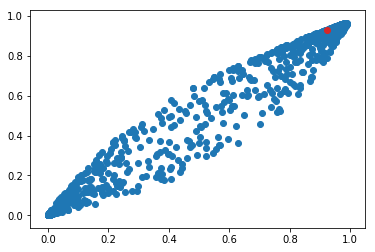

In [46]:
plt.scatter(w[:, 0], w[:, 1])
plt.scatter(w[555, 0], w[555, 1], c = 'C3')

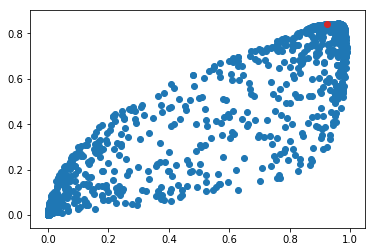

In [47]:
plt.scatter(w[:, 0], w[:, 2])
plt.scatter(w[555, 0], w[555, 2], c = 'C3')

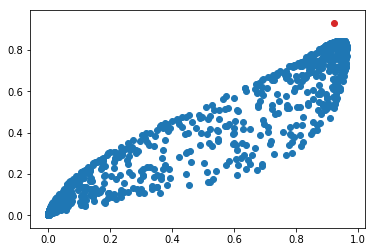

In [48]:
plt.scatter(w[:, 1], w[:, 2])
plt.scatter(w[555, 0], w[555, 1], c = 'C3')

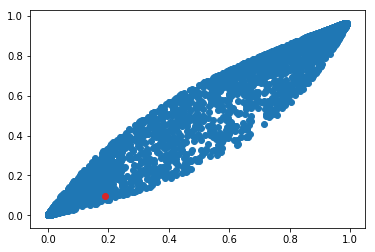

In [49]:
plt.scatter(z[:, 0], z[:, 1])
plt.scatter(z[555, 0], z[555, 1], c = 'C3')

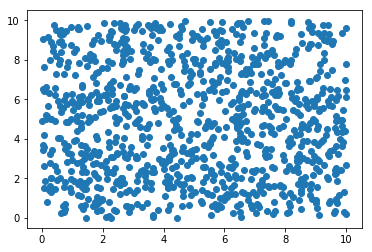

In [50]:
plt.scatter(lat[5000:,0], lat[5000:,1])

In [51]:
from sklearn.decomposition import PCA

In [52]:
pcs = PCA(n_components = 2)

In [53]:
q = pcs.fit_transform(lat)

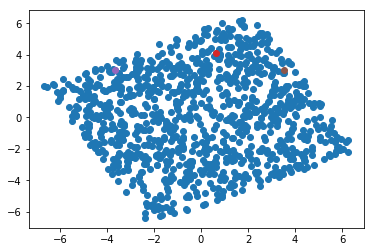

In [54]:
plt.figure()
plt.scatter(q[5000:, 0], q[5000:, 1])
plt.scatter(q[5555, 0], q[5555, 1], c= 'C3' )
plt.scatter(q[5505, 0], q[5505, 1], c= 'C4' )
plt.scatter(q[5005, 0], q[5505, 1], c= 'C5' )

In [55]:
other_pcs = PCA(n_components =2)

In [56]:
ww = other_pcs.fit_transform(w)

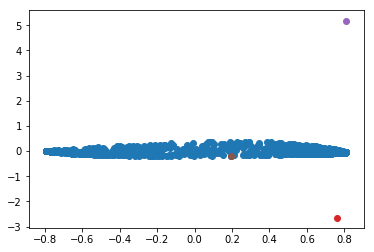

In [57]:
plt.figure()
plt.scatter(ww[:, 0], ww[:, 1])
plt.scatter(ww[555, 0], q[555, 0], c= 'C3' )
plt.scatter(ww[505, 0], q[505, 0], c= 'C4')
plt.scatter(ww[5, 0], ww[5, 1], c= 'C5' )

In [58]:
cols = ['lat1', 'lat2', 'auto1', 'auto2', 'auto3', 'latpc1', 'latpc2', 'auto_pc1', 'auto_pc2']

In [59]:
lat[5000:, :].shape

(1000, 2)

In [60]:
dat = np.concatenate([lat[5000:, :], w, q[5000:, :], ww], axis = 1)

In [61]:
dat.shape

(1000, 9)

In [62]:
import pandas as pd

In [63]:
df = pd.DataFrame(data = dat, columns = cols)

In [64]:
df.head()

,lat1,lat2,auto1,auto2,auto3,latpc1,latpc2,auto_pc1,auto_pc2
0,2.173920,5.955077,0.108850,0.172583,0.260514,2.934691,0.408527,-0.494842,-0.125791
1,4.136116,7.946941,0.008554,0.010732,0.037457,2.087061,-2.255916,-0.764887,-0.011401
2,4.883643,7.159737,0.036561,0.039180,0.078020,1.064115,-1.892505,-0.710319,-0.026458
3,0.141615,6.621342,0.027806,0.062189,0.151642,5.048408,0.734682,-0.665927,-0.090090
4,8.168217,7.847207,0.026942,0.014095,0.019121,-1.553187,-3.992689,-0.760273,0.014369


In [65]:
df['color'] = df['lat1']*df['lat2']

In [66]:
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(df.color), vmax=max(df.color))
colors = [cmap(normalize(i)) for i in df.color]

Text(0.5,1,'latent space')

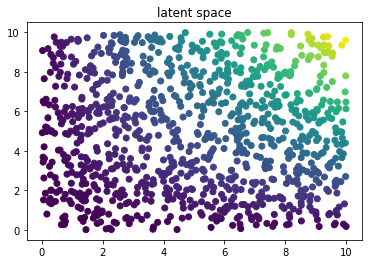

In [67]:
plt.scatter(df.lat1, df.lat2, c =colors)
plt.title('latent space')

Text(0.5,1,'autoencoder output')

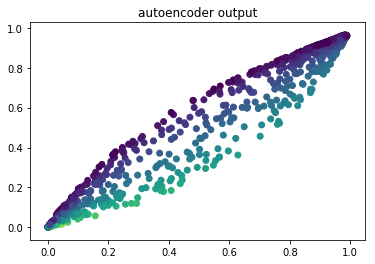

In [68]:
plt.scatter(df.auto1, df.auto2, c =colors)
plt.title('autoencoder output')

Text(0.5,1,'PCA over latent space')

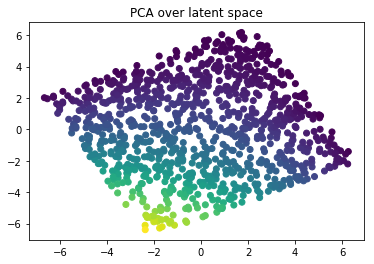

In [69]:
plt.scatter(df.latpc1, df.latpc2, c =colors)
plt.title('PCA over latent space')

Text(0,0.5,'pc2')

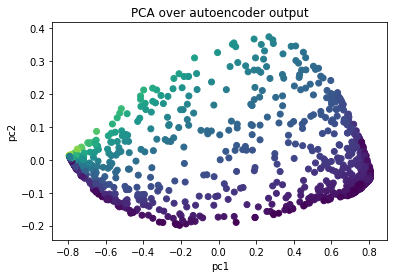

In [70]:
plt.scatter(df.auto_pc1, df.auto_pc2, c =colors)
plt.title('PCA over autoencoder output')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [71]:
pc_over_all = PCA(n_components = 2)

In [72]:
pc_over_samples = pc_over_all.fit_transform(samp[5000:, :])

Text(0,0.5,'pc2')

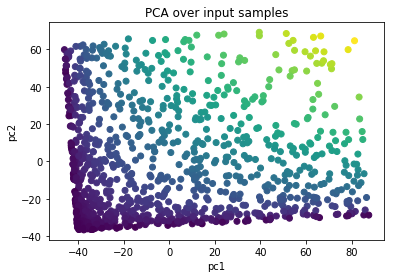

In [73]:
plt.scatter(pc_over_samples[:, 0], pc_over_samples[:, 1], c =colors)
plt.title('PCA over input samples')
plt.xlabel('pc1')
plt.ylabel('pc2')